<a href="https://colab.research.google.com/github/joezaarour/Repo1/blob/main/lab3_AV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial Data Analysis with Alpha Vantage
**Objective:** Fetch, analyze, and visualize financial data using Alpha Vantage API.

Documentation : https://pypi.org/project/alpha-vantage/
---

## 0. Introduction & Setup

### A. Why Alpha Vantage?
- Free tier available
- Covers stocks, forex, crypto, and more
- Well-documented and reliable

### B. Get Your API Key
1. Sign up at [Alpha Vantage](https://www.alphavantage.co/support/#api-key).
2. Copy your free API key.

### C. Install Libraries
```bash
!pip install alpha_vantage
```

### D. Import Libraries

In [1]:
!pip install alpha_vantage

In [2]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.foreignexchange import ForeignExchange
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.fundamentaldata import FundamentalData
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

---

## 1. Basic Data Fetching

---



### A. Fetch Daily Stock Data

In [3]:
# Replace with your API key
api_key = 'C4208LH119SOGH1M'
ts = TimeSeries(key=api_key, output_format='pandas')
aapl_daily, meta_data = ts.get_daily('AAPL')
aapl_daily = aapl_daily.rename(columns={'1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close', '5. volume': 'Volume'})
aapl_daily = aapl_daily.sort_index(ascending=True)
aapl_daily.head()

,Open,High,Low,Close,Volume
date,,,,,
2025-05-13,210.43,213.40,209.0000,212.93,51909332.0
2025-05-14,212.43,213.94,210.5801,212.33,49325825.0
2025-05-15,210.95,212.96,209.5400,211.45,45029473.0
2025-05-16,212.36,212.57,209.7700,211.26,54737850.0
2025-05-19,207.91,209.48,204.2600,208.78,46140527.0


# Exercise:
Write a function that takes a dataframe as parameter and automatically renames the columns

In [12]:
def rename_alpha_vantage_columns(df):
    """
    Automatically renames Alpha Vantage dataframe columns
    by removing numeric prefixes (e.g., '1. open' → 'Open').

    Parameters:
        df (pd.DataFrame): DataFrame returned by Alpha Vantage

    Returns:
        pd.DataFrame: DataFrame with renamed columns
    """
    new_columns = {col: col.split('. ')[1].capitalize() for col in df.columns}
    return df.rename(columns=new_columns)


api_key = 'C4208LH119SOGH1M'
ts = TimeSeries(key=api_key, output_format='pandas')
aapl_daily, meta_data = ts.get_daily('AAPL')
aapl_daily = rename_alpha_vantage_columns(aapl_daily)
aapl_daily = aapl_daily.sort_index(ascending=True)
aapl_daily.head()

,Open,High,Low,Close,Volume
date,,,,,
2025-05-13,210.43,213.40,209.0000,212.93,51909332.0
2025-05-14,212.43,213.94,210.5801,212.33,49325825.0
2025-05-15,210.95,212.96,209.5400,211.45,45029473.0
2025-05-16,212.36,212.57,209.7700,211.26,54737850.0
2025-05-19,207.91,209.48,204.2600,208.78,46140527.0


### B. Basic Analysis & Visualization
* Plot the closing prices
* Calculate and plot the moving averages for 20 and 50 dates windows
  * hint: look at the 'rolling' and 'mean' functions in pandas
* Calculate and plot daily returns

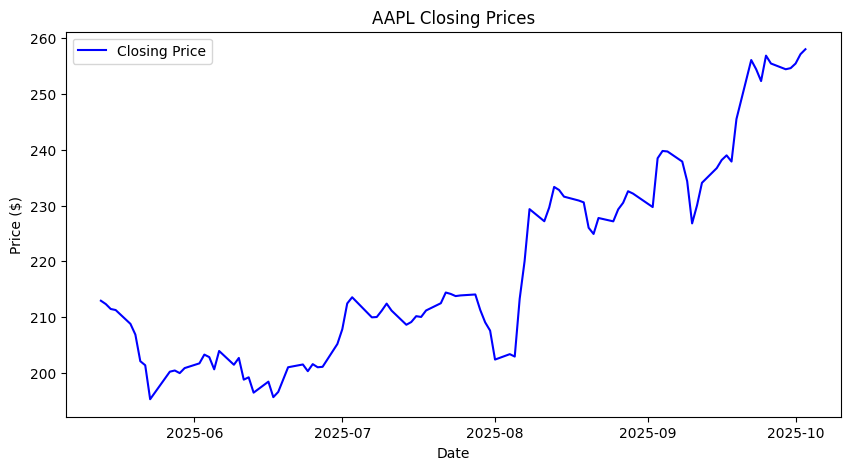

In [13]:
# Plot closing price
plt.figure(figsize=(10,5))
plt.plot(aapl_daily['Close'], label='Closing Price', color='blue')
plt.title('AAPL Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


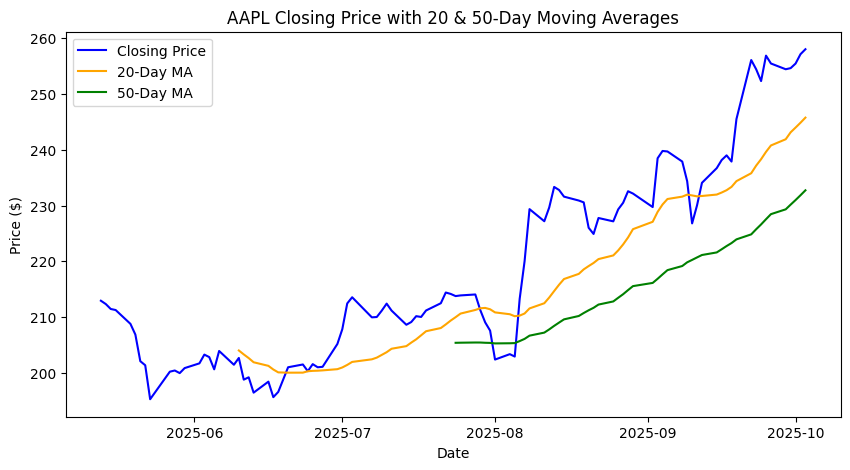

In [15]:
# Calculate Moving averages
aapl_daily['MA20'] = aapl_daily['Close'].rolling(window=20).mean()
aapl_daily['MA50'] = aapl_daily['Close'].rolling(window=50).mean()

#Plot
plt.figure(figsize=(10,5))
plt.plot(aapl_daily['Close'], label='Closing Price', color='blue')
plt.plot(aapl_daily['MA20'], label='20-Day MA', color='orange')
plt.plot(aapl_daily['MA50'], label='50-Day MA', color='green')
plt.title('AAPL Closing Price with 20 & 50-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

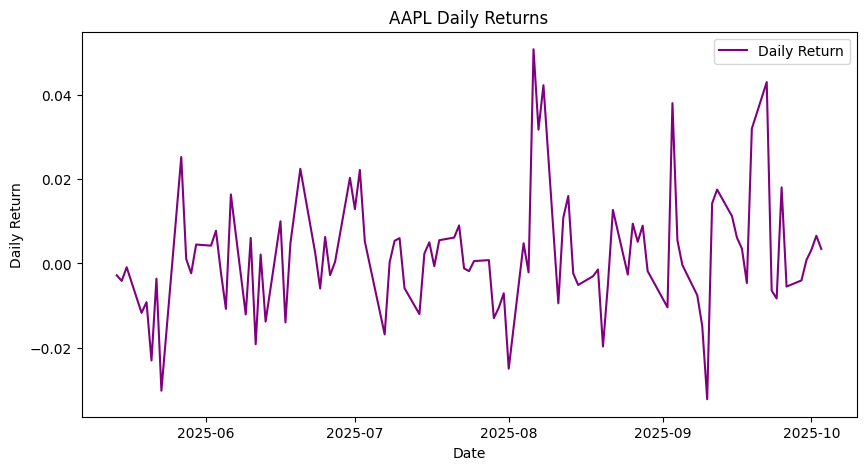

In [16]:
# Calculate daily returns
aapl_daily['Daily Return'] = aapl_daily['Close'].pct_change()

# Plot
plt.figure(figsize=(10,5))
plt.plot(aapl_daily['Daily Return'], label='Daily Return', color='purple')
plt.title('AAPL Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()



---

## 2. Advanced Data Types

### A. Fetch Forex Data
* Get daily currency exchanges daily from EUR to USD
  * Use your function to format the dataframe
  * Plot the result

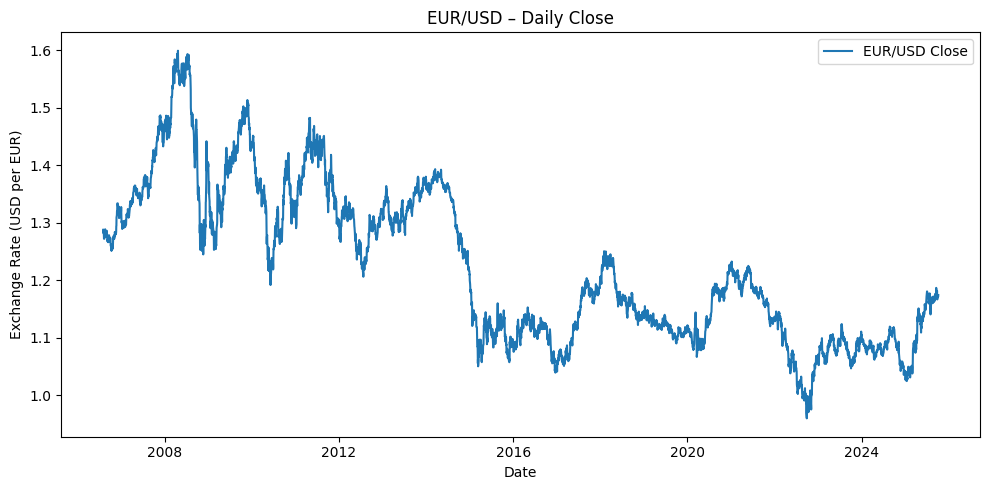

In [22]:
# Fetch data
# A. Fetch Forex Data: EUR -> USD (Daily)

from alpha_vantage.foreignexchange import ForeignExchange
import pandas as pd
import matplotlib.pyplot as plt

api_key = 'C4208LH119SOGH1M'  # use your key

# 1) Helper to auto-rename Alpha Vantage columns (e.g., "1. open" -> "Open")
def rename_alpha_vantage_columns(df: pd.DataFrame) -> pd.DataFrame:
    mapping = {}
    for col in df.columns:
        parts = col.split('. ', 1)
        clean = parts[1] if len(parts) == 2 else col
        mapping[col] = clean.capitalize()
    return df.rename(columns=mapping)

# 2) Fetch daily EUR/USD
fx = ForeignExchange(key=api_key, output_format='pandas')
eurusd_daily, meta_fx = fx.get_currency_exchange_daily(
    from_symbol='EUR',
    to_symbol='USD',
    outputsize='full'  # 'compact' for ~100 recent days
)

# 3) Format dataframe
eurusd_daily = rename_alpha_vantage_columns(eurusd_daily)
eurusd_daily.index = pd.to_datetime(eurusd_daily.index)
eurusd_daily = eurusd_daily.sort_index()  # ascending dates

# 4) Plot (closing rate)
plt.figure(figsize=(10,5))
plt.plot(eurusd_daily['Close'], label='EUR/USD Close')
plt.title('EUR/USD – Daily Close')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD per EUR)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Plot EUR/USD


### B. Fetch Crypto Data
* Retrieve Bitcoin digital currence ('BTC') in the 'USD' market
* Plot the closing prices

Columns returned by Alpha Vantage:
 Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object') 

Using column: 4. close


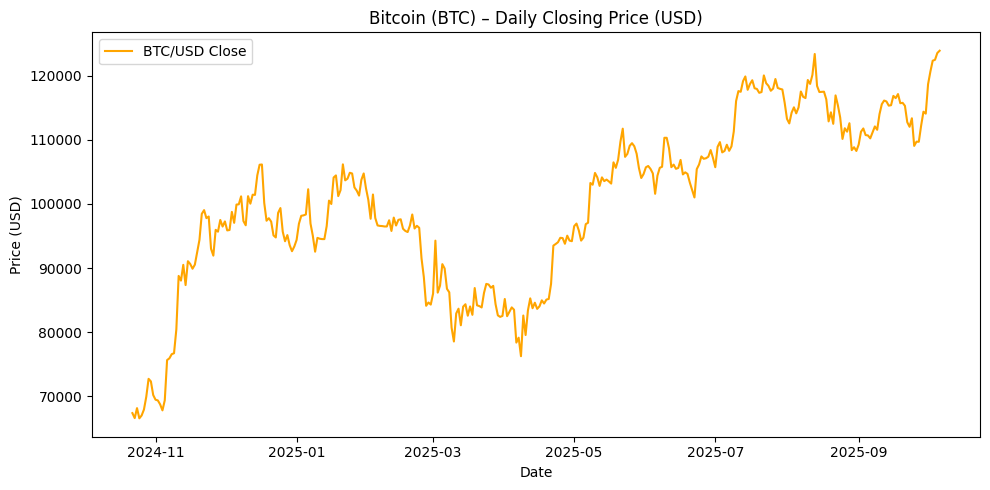

In [25]:
# Fetch BTC data
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import pandas as pd
import matplotlib.pyplot as plt

api_key = 'C4208LH119SOGH1M'

cc = CryptoCurrencies(key=api_key, output_format='pandas')
btc_raw, meta = cc.get_digital_currency_daily(symbol='BTC', market='USD')

# Print column names to see what’s actually there
print("Columns returned by Alpha Vantage:\n", btc_raw.columns, "\n")

# Try to find the right close column automatically
close_cols = [c for c in btc_raw.columns if 'close' in c.lower()]

if not close_cols:
    raise ValueError("No close columns found. Check the dataframe columns above.")

# Pick the first 'close' column found (usually '4a. close (USD)')
close_col = close_cols[0]
print(f"Using column: {close_col}")

# Build dataframe
btc = pd.DataFrame(index=pd.to_datetime(btc_raw.index).sort_values())
btc['Close'] = btc_raw.loc[btc.index, close_col].astype(float)

# Plot closing prices
plt.figure(figsize=(10,5))
plt.plot(btc.index, btc['Close'], label='BTC/USD Close', color='orange')
plt.title('Bitcoin (BTC) – Daily Closing Price (USD)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
# Plot BTC/USD


### C. Fetch Technical Indicators (SMA, RSI, MACD)
* Retrieve the relative strength index (RSI) for Apple ('AAPL')
* Plot the result

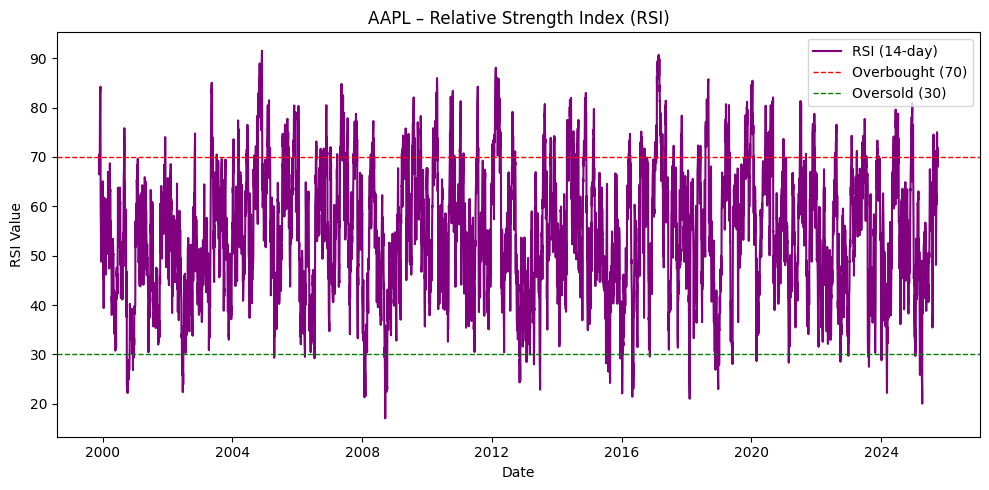

In [26]:
# Fetch RSI
from alpha_vantage.techindicators import TechIndicators
import pandas as pd
import matplotlib.pyplot as plt

api_key = 'C4208LH119SOGH1M'

# 1️⃣ Initialize TechIndicators
ti = TechIndicators(key=api_key, output_format='pandas')

# 2️⃣ Fetch RSI for Apple (AAPL)
rsi_data, meta_rsi = ti.get_rsi(symbol='AAPL', interval='daily', time_period=14, series_type='close')

# Format
rsi_data.columns = ['RSI']
rsi_data.index = pd.to_datetime(rsi_data.index)
rsi_data = rsi_data.sort_index()

# 3️⃣ Plot RSI
plt.figure(figsize=(10,5))
plt.plot(rsi_data['RSI'], label='RSI (14-day)', color='purple')
plt.title('AAPL – Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.axhline(70, color='red', linestyle='--', linewidth=1, label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', linewidth=1, label='Oversold (30)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Plot RSI


---

## 3. Data Analysis & Visualization

### A. Correlation Analysis
* Retrieve some more daily stock data for comparison
  * Compute daily return
  * merge the two 'Daily return' columns from your two dataframes using pd.merge (relevant parameters: left_index=True, right_index=True, suffixes=('_sufx1', '_sufx2')
  * Drop all NaN rows and display result
  * Compute correlation using corr() on the merged df
  * Visualize the correlation using seaborn

In [28]:
# Fetch  data for comparison

from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

api_key = 'C4208LH119SOGH1M'

# Helper to clean Alpha Vantage column names (e.g., "1. open" -> "Open")
def rename_alpha_vantage_columns(df: pd.DataFrame) -> pd.DataFrame:
    return df.rename(columns={c: c.split('. ', 1)[1].capitalize() if '. ' in c else c for c in df.columns})

ts = TimeSeries(key=api_key, output_format='pandas')
aapl, _ = ts.get_daily(symbol='AAPL', outputsize='full')
msft, _ = ts.get_daily(symbol='MSFT', outputsize='full')

aapl = rename_alpha_vantage_columns(aapl).sort_index()
msft = rename_alpha_vantage_columns(msft).sort_index()

aapl['Daily Return'] = aapl['Close'].pct_change()
msft['Daily Return'] = msft['Close'].pct_change()


# Merge daily returns
merged = pd.merge(
    aapl[['Daily Return']],
    msft[['Daily Return']],
    left_index=True,
    right_index=True,
    suffixes=('_AAPL', '_MSFT')
)

# Drop rows with NaNs from the initial pct_change
merged = merged.dropna()

# Quick peek
print(merged.head())


            Daily Return_AAPL  Daily Return_MSFT
date                                            
1999-11-02           0.033883           0.002057
1999-11-03           0.015576          -0.006050
1999-11-04           0.026012          -0.002717
1999-11-05           0.056087          -0.002071
1999-11-08           0.091269          -0.017693


In [29]:
# Calculate correlation
corr_matrix = merged.corr()
corr_value = corr_matrix.loc['Daily Return_AAPL', 'Daily Return_MSFT']
print(f"Correlation between AAPL and MSFT daily returns: {corr_value:.4f}")
print("\nCorrelation matrix:\n", corr_matrix)

Correlation between AAPL and MSFT daily returns: 0.3662

Correlation matrix:
                    Daily Return_AAPL  Daily Return_MSFT
Daily Return_AAPL            1.00000            0.36622
Daily Return_MSFT            0.36622            1.00000


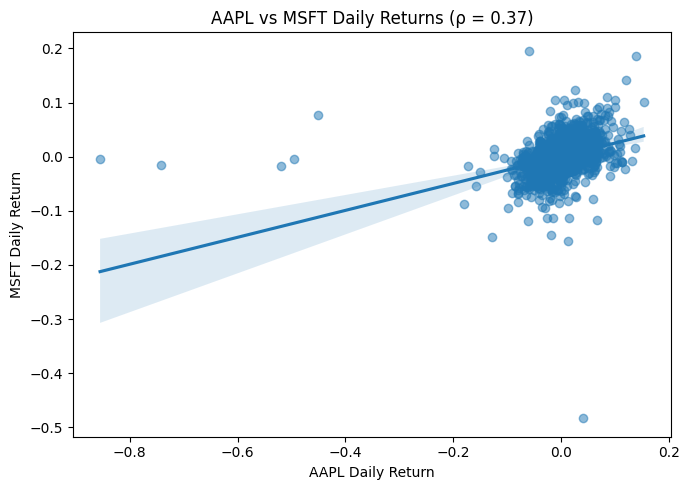

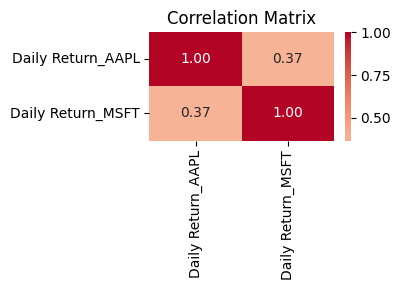

In [30]:
# Plot scatter and regression line
plt.figure(figsize=(7,5))
sns.regplot(
    data=merged,
    x='Daily Return_AAPL',
    y='Daily Return_MSFT',
    scatter_kws={'alpha': 0.5}
)
plt.title(f'AAPL vs MSFT Daily Returns (ρ = {corr_value:.2f})')
plt.xlabel('AAPL Daily Return')
plt.ylabel('MSFT Daily Return')
plt.tight_layout()
plt.show()

# (Optional) Heatmap of the correlation matrix
plt.figure(figsize=(4,3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()